In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('/content/DS_DATESET.csv')

labelencoder = LabelEncoder()
df['year1'] = labelencoder.fit_transform(df['Which-year are you studying in?'])
df['output'] = labelencoder.fit_transform(df['Label'])


In [13]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

x4=df[["CGPA/ percentage","Rate your written communication skills [1-10]","Rate your verbal communication skills [1-10]","year1"]]
y4=df['output']

x_train1, x_test1, y_train1,y_test1=train_test_split(x4,y4,test_size=0.20,random_state=42)

In [14]:
ans1=GaussianNB()
ans1.fit(x_train1, y_train1)
y_pre1= ans1.predict(x_test1)
print("GaussianNB accuracy %:",accuracy_score(y_test1,y_pre1)*100)
print("GaussianNB roc_auc_score :",roc_auc_score(y_test1,y_pre1))
print(f1_score(y_test1, y_pre1))

GaussianNB accuracy %: 86.35000000000001
GaussianNB roc_auc_score : 0.836442096453604
0.8953622077424301


In [15]:
ans2=KNeighborsClassifier()
ans2.fit(x_train1, y_train1)
y_pre2= ans2.predict(x_test1)
print("KNN accuracy % :",accuracy_score(y_test1,y_pre2)*100)
print("KNN roc_auc_score :",roc_auc_score(y_test1,y_pre2))
print(f1_score(y_test1, y_pre2))

KNN accuracy % : 99.35000000000001
KNN roc_auc_score : 0.9930902814101894
0.9946303180503924


In [16]:

ans3=RandomForestClassifier()
ans3.fit(x_train1, y_train1)
y_pred4= ans3.predict(x_test1)
print("RANDOM FOREST accuracy % :",accuracy_score(y_test1,y_pred4)*100)
print("RANDOM FOREST roc_auc_score :",roc_auc_score(y_test1,y_pred4))
print(f1_score(y_test1, y_pred4))

RANDOM FOREST accuracy % : 100.0
RANDOM FOREST roc_auc_score : 1.0
1.0


In [17]:
arr=confusion_matrix(y_test1,y_pred4)
arr

array([[ 790,    0],
       [   0, 1210]])

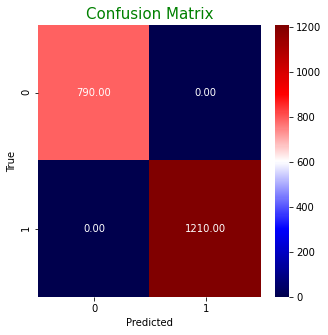

In [18]:
cm_df = pd.DataFrame(arr,[0,1],[0,1])                      
plt.figure(figsize=(5,5))   
plt.title('Confusion Matrix',fontsize=15,color='green')
sns.heatmap(cm_df, annot=True,fmt='.2f',cmap="seismic")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()